# 2-4 データを工夫して記憶する "データ構造"

## 木・二分木

...

## プライオリティーキューとヒープ

### プライオリティーキュー
- 数の追加
- 最小の数値を取り出す

**プライオリティーキューは抽象データ構造であり，これを二分木を用いて効率的に実現（具体的に実装）するのがヒープ**

### ヒープ

- 子の数字は親の数字よりも大きい
- 葉ノードは左から順に埋められる（完全ニ分木）
- 高々，最大の深さまでしか繰り返しは起こらない．計算量は$O(\log{N})$

**実装には一次元配列が用いられる**

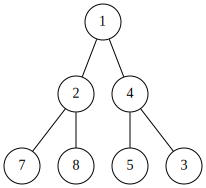

In [11]:
import graphviz

dot = graphviz.Graph()
dot.attr('node', shape='circle')

dot.edge('1', '2')
dot.edge('1', '4')
dot.edge('2', '7')
dot.edge('2', '8')
dot.edge('4', '5')
dot.edge('4', '3')

dot

In [22]:
import heapq
import random

que = list(range(1, 17))
random.shuffle(que)
print(f'before: {que}')

heapq.heapify(que)  # queはリストをそのまま利用する
print(f' after: {que}')

# heapq.heappop(que)  # 要素の追加
# heapq.heappush(que, x)　# 要素の削除

before: [5, 8, 10, 7, 1, 11, 16, 15, 12, 14, 13, 2, 4, 6, 3, 9]
 after: [1, 5, 2, 7, 8, 4, 3, 9, 12, 14, 13, 11, 10, 6, 16, 15]


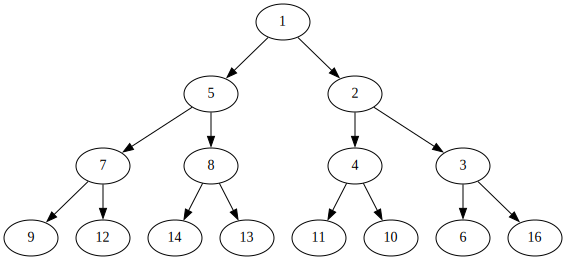

In [24]:
import graphviz

dot = graphviz.Digraph()
for i in range(7):
    dot.edge(str(que[i]), str(que[2 * i + 1]))
    dot.edge(str(que[i]), str(que[2 * i + 2]))
dot

In [ ]:
# Expedition

- その場でガソリンを給油する必要はない
  - 後から時間を巻き戻して給油することが制約より可能
- 各ガソリンスタンドの到着時点をシミュレートし，そのガソリンスタンドへ辿り着けないなら過去に通った未使用のガソリンスタンドで最大限給油したことにする

In [2]:
# Fence Repair

- 板の集合から最も短い2つの板を取り出し，長さが2つの板の長さの和となる板をキューに追加する


## 二分探索木

次の操作を効率的に行うデータ構造
- 数値を追加する
- ある数値が含まれているかを判定する
- ある数値を削除する

任意の頂点$v$に対し，$v$の左部分木に含まれる全ての頂点$v\prime$に対して$key[v]\geqq key[v\prime]$が成立し，$v$の右部分木に含まれる全ての頂点$v\prime$に対して$key[v]\leqq key[v\prime]$が成立する．  

【引用】大槻兼資／問題解決力を鍛える アルゴリズムとデータ構造（項179）

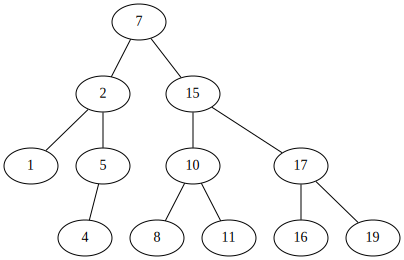

In [23]:
import graphviz

dot = graphviz.Graph()
dot.edge('7', '2')
dot.edge('7', '15')
dot.edge('2', '1')
dot.edge('2', '5')
dot.edge('5', '4')
dot.edge('15', '10')
dot.edge('15', '17')
dot.edge('10', '8')
dot.edge('10', '11')
dot.edge('17', '16')
dot.edge('17', '19')
dot


## Union-Find木

次の操作を効率的に行うデータ構造
- 要素aと要素bが同じグループに属するか判定する(same)
- 要素aと要素bの各々が属するグループを併合する(merge)

In [1]:
from __future__ import annotations


class DSU:
    """
    無向グラフに対して，
    - 辺の追加
    - 2頂点が連結かの判定

    の操作をならし時間O(α(n))で提供します．
    """

    def __init__(self, n: int) -> None:
        """n頂点0辺の無向グラフを作ります．O(n)"""
        self._parents: list[int] = [-1] * n

    def merge(self, a: int, b: int) -> None:
        """辺(a, b)を足します．O(α(n))"""
        a: int = self.leader(a)
        b: int = self.leader(b)
        if a == b:
            return
        if self._parents[a] > self._parents[b]:
            a, b = b, a
        self._parents[a] += self._parents[b]
        self._parents[b] = a

    def same(self, a: int, b: int) -> bool:
        """頂点a, bが連結かどうかを返します．O(α(n))"""
        return self.leader(a) == self.leader(b)

    def leader(self, a: int) -> int:
        """頂点aの属する連結成分の代表元を返します．O(α(n))"""
        stack: list[int] = []
        while self._parents[a] >= 0:
            stack.append(a)
            a: int = self._parents[a]
        for b in stack:
            self._parents[b] = a
        return a

    def size(self, a: int) -> int:
        """頂点aの属する連結成分のサイズを返します．O(α(n))"""
        return -self._parents[self.leader(a)]

    def leaders(self) -> list[int]:
        """各連結成分の代表元を返します．O(N)"""
        return [i for i, a in enumerate(self._parents) if a < 0]

    def group_count(self):
        """連結成分の個数を返します．O(n)"""
        return len(self.leaders())

In [ ]:
# 食物連鎖

- 愚直に割り当ててもいいが，各要素についてそれぞれのグループに属する場合を分けて考えたとしても操作に支障はない
  - 実装が楽になる
  - 対称性が影響